# BigMart Sales Prediction

## Objective:

- The data scientists at BigMart gathered product and store data from 2013, including information on 1559 unique items across 10 stores. Also, certain attributes of each product and store have been defined.
- The aim is to build a model that forecasts sales for any product at any store. This will help them understand which product and store characteristics have the biggest impact on sales, allowing them to optimize their strategies.

## Dataset

- Item_Identifier : Unique product ID
- Item_Weight : Weight of product
- Item_Fat_Content : Whether the product is low fat or not
- Item_Visibility : The % of total display area of all products in a store allocated to the particular product
- Item_Type : The category to which the product belongs
- Item_MRP : Maximum Retail Price (list price) of the product
- Outlet_Identifier : Unique store ID
- Outlet_Establishment_Year : The year in which store was established
- Outlet_Size : The size of the store in terms of ground area covered
- Outlet_Location_Type : The type of city in which the store is located
- Outlet_Type : Whether the outlet is just a grocery store or some sort of supermarket
- Item_Outlet_Sales : Sales of the product in the particular store

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
plt.style.use('dark_background')

## Data Exploration
### Loading the Data 

In [2]:
sales_data = pd.read_csv('Train.csv')

### Checking the First 5 Rows of the Dataframe

In [3]:
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


It is important to note that "Item_Outlet_Sales" is the target variable which we are going to predict & the remaining are the feature variables

### Checking Shape

In [4]:
sales_data.shape

(8523, 12)

Hence, we are having 8523 different products with 12 features

### Checking Info

In [5]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Categorical Features:

- Item_Identifier : categories of different products
- Item_Fat_Content : It tells us whether it has high fat content or low fat content or regular fat content
- Item_Type : It tells us whether it has meat or soft drink & such kind of things
- Outlet_Identifier : It tells us the unique ID of the outlet
- Outlet_Size : it tells us whether it is medium,high or small in size
- Outlet_Location_Type : It tells us whether it is tier 1 or tier 2 & such kind of things
- Outlet_Type : It tells us whether it is supermarket or grocerry store

### Checking the target variable

In [6]:
sales_data['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

## Treatment of Outliers

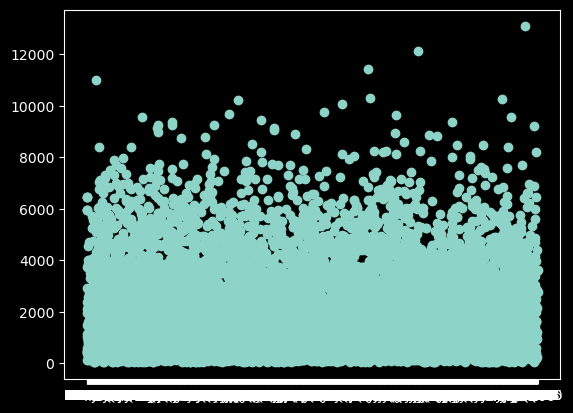

In [7]:
plt.scatter(x = sales_data['Item_Identifier'],
            y = sales_data['Item_Outlet_Sales'])

<Axes: xlabel='Item_Outlet_Sales'>

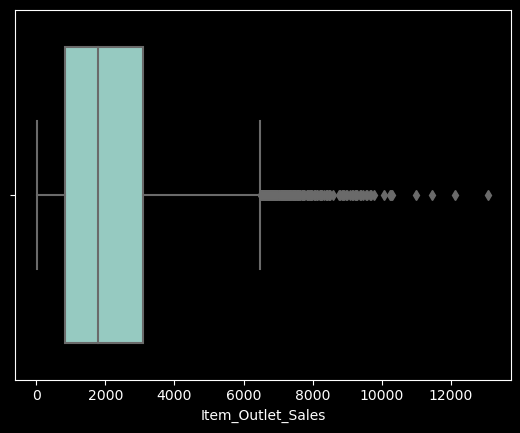

In [8]:
sns.boxplot(x= sales_data['Item_Outlet_Sales'])

In [9]:
q1 = sales_data['Item_Outlet_Sales'].quantile(0.25)
q3 = sales_data['Item_Outlet_Sales'].quantile(0.75)

In [10]:
iqr = q3 - q1
iqr

2267.049

In [11]:
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr
lower_limit, upper_limit

(-2566.3261, 6501.8699)

In [12]:
def limit_imputer(value):
    if value > upper_limit:
        return upper_limit
    if value < lower_limit:
        return lower_limit
    else:
        return value

In [13]:
sales_data['Item_Outlet_Sales'] = sales_data['Item_Outlet_Sales'].apply(limit_imputer)

In [14]:
sales_data['Item_Outlet_Sales'].describe()

count    8523.000000
mean     2156.313016
std      1624.863069
min        33.290000
25%       834.247400
50%      1794.331000
75%      3101.296400
max      6501.869900
Name: Item_Outlet_Sales, dtype: float64

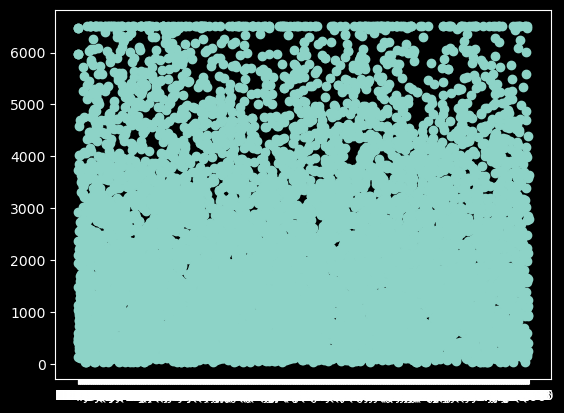

In [15]:
plt.scatter(x = sales_data['Item_Identifier'],
            y = sales_data['Item_Outlet_Sales'])

## Treatment of Missing Values

In [16]:
sales_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We can observe that we are having 1463 missing values in the Item_Weight column & we are having about 2410 missing values in the Outlet_Size column

### Dealing with missing values

**Mean --> average**

* The Mean value of a dataset is the average value i.e. a number around which a whole data is spread out. All values used in calculating the average are weighted equally when defining the Mean

* In this case, in order to convert the missing values in the numerical column, we use mean of that particular column

**Mode --> most repeated value**

* The mode is the value that appears most frequently in a data set. A set of data may have one mode, more than one mode, or no mode at all.The mode can be the same value as the mean and/or median, but this is usually not the case.

* In this case, in order to convert the missing values in the categorical feature, we use the mode of that particular column

In [17]:
# filling the missing values in "Item_weight column" with "Mean" value
sales_data['Item_Weight'].fillna(sales_data['Item_Weight'].mean(), inplace=True)

In [18]:
# filling the missing values in "Outlet_Size" column with Mode
# Here we take Outlet_Size column & Outlet_Type column since they are correlated
mode_of_Outlet_size = sales_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [19]:
miss_values = sales_data['Outlet_Size'].isnull()
sales_data.loc[miss_values, 'Outlet_Size'] = sales_data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [20]:
sales_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Analyzing the Data

In [21]:
#stastical measures about the data
sales_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2156.313016
std,4.226124,0.051598,62.275067,8.371760,1624.863069
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,6501.869900


## Data Visualization

- Data visualization is the graphical representation of information and data. 
- It enables decision makers to see analytics presented visually, so they can grasp difficult concepts or identify new patterns 

### Visualization of Numerical Variables

In [22]:
sns.set()

<Axes: xlabel='Item_Weight', ylabel='Count'>

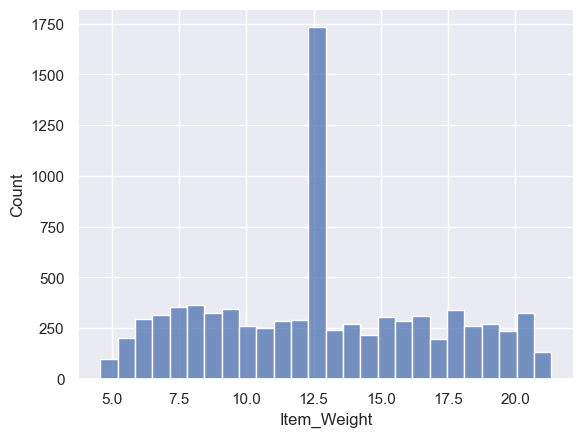

In [23]:
# Item_Weight distribution
#plt.figure(figsize=(5,5))
sns.histplot(sales_data['Item_Weight'])

<Axes: xlabel='Item_Visibility', ylabel='Count'>

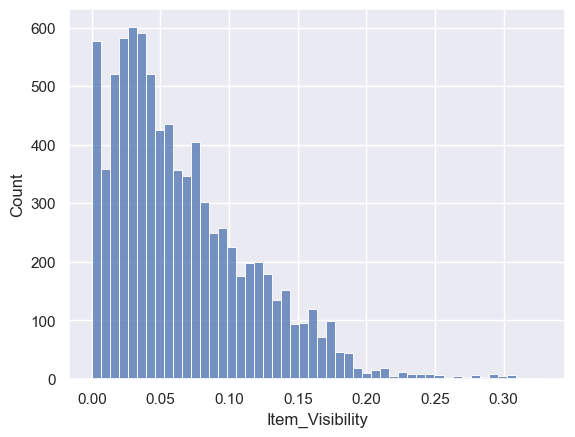

In [24]:
sns.histplot(sales_data['Item_Visibility'])

<Axes: xlabel='Item_MRP', ylabel='Count'>

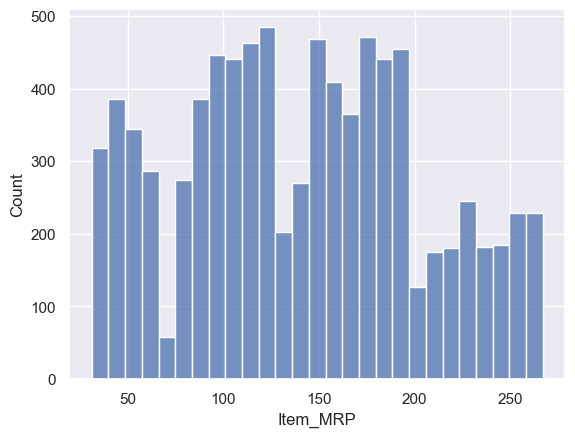

In [25]:
sns.histplot(sales_data['Item_MRP'])

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

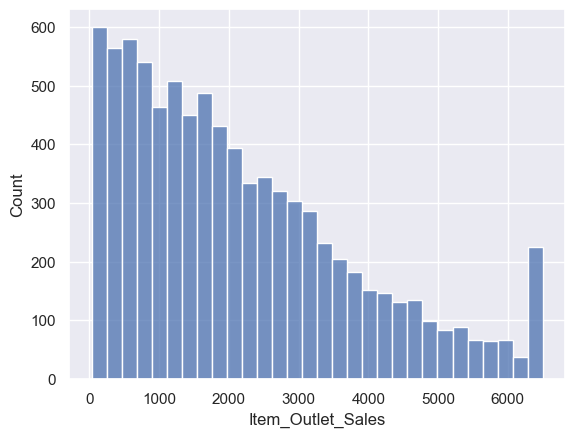

In [26]:
sns.histplot(sales_data['Item_Outlet_Sales'])

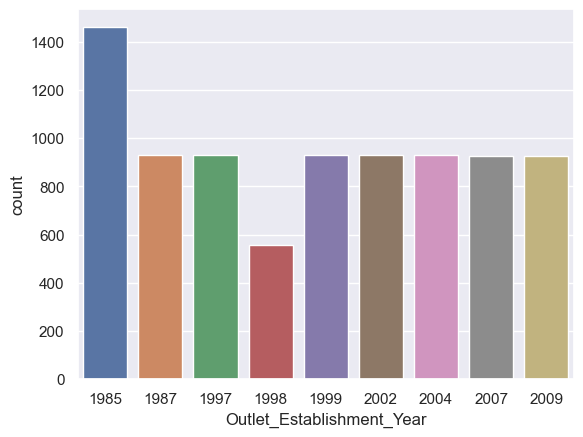

In [27]:
sns.countplot(x='Outlet_Establishment_Year', data=sales_data)
plt.show()

- Hence from the above graph we can observe that we have the outlet establishment from the year 1985, 1987 and all the way to 2009 

- Therefore these are the years on which different outlets or different stores have been established 

- We can also observe that a lots of stores are established in the year 1985 & less in the year 1998 & all the others years are almost same

### Visualization of Categorical Variables

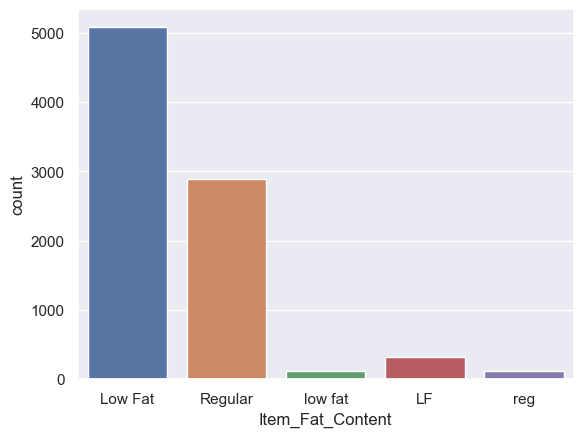

In [28]:
# Item_Fat_Content column
#plt.figure(figsize=(5,5))
sns.countplot(x='Item_Fat_Content', data=sales_data)
plt.show()

From the above graph we can observe that the data in the Item_Fat_Content column has to be cleaned since we have columns such as Low fat,low fat & Lf which is same & must be put into a single particular label.Similarly we have Regular & reg where we need to put this into a single entity.

Hence, we need to pre process this data so we will be dealing with this in a later point of time after the visualization of the data

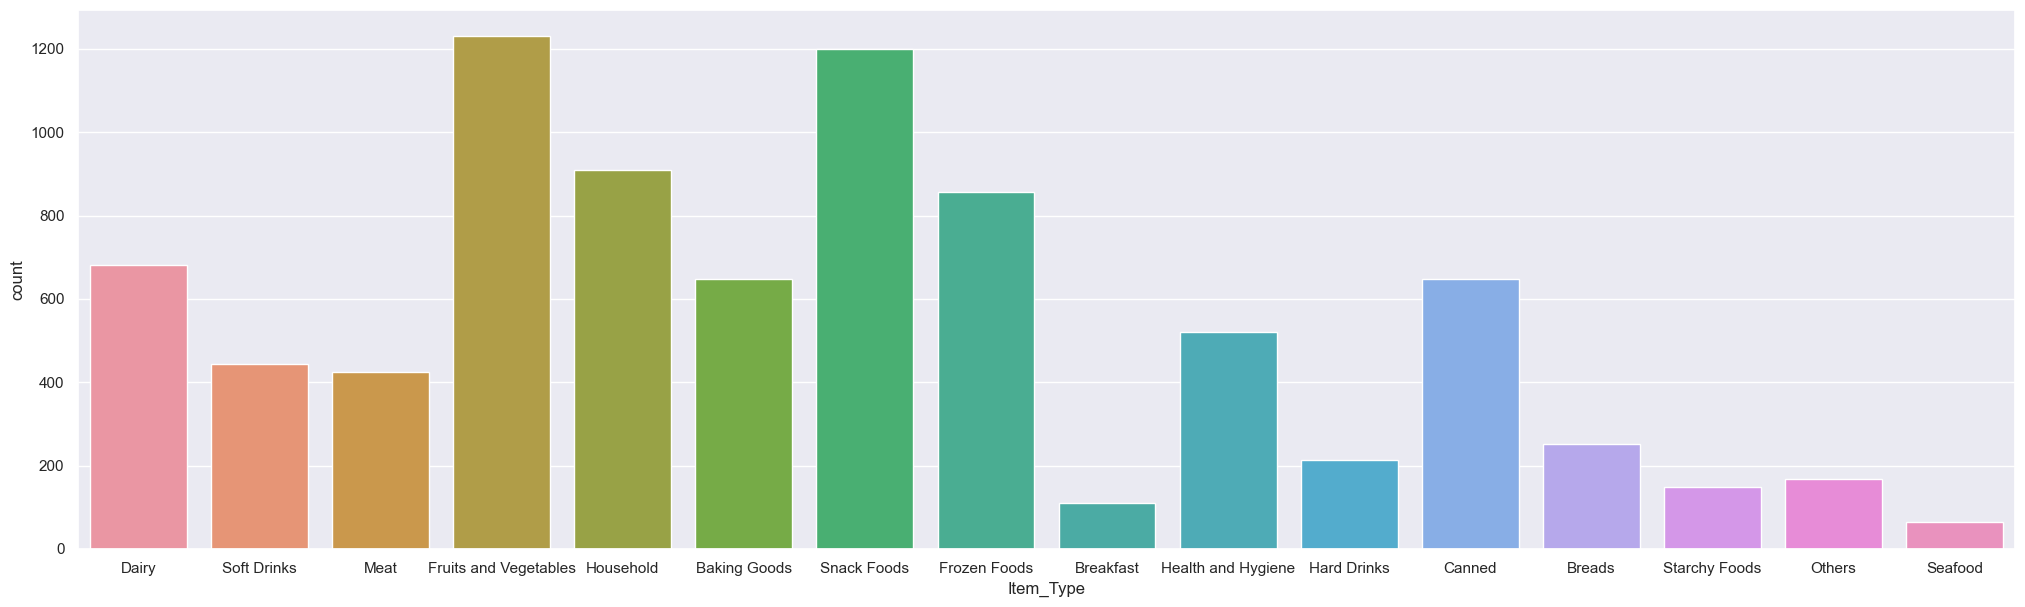

In [29]:
# Item_Type column
plt.figure(figsize=(25,7))
sns.countplot(x='Item_Type', data=sales_data)
plt.show()

From the above graph we can observe the different items or food types we have such as dairy, soft drinks, meat, fruits & vegetables, household etc 

Hence totally we have about 16 Item_Type values in this case where we have more values in the fruits & vegetables column and snack foods column

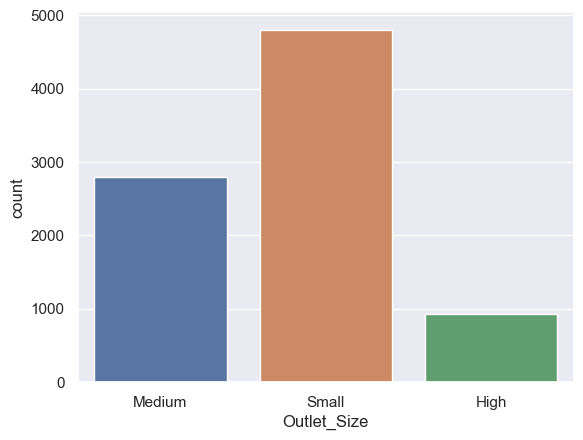

In [30]:
# Outlet_Size column
#plt.figure(figsize=(5,5))
sns.countplot(x='Outlet_Size', data=sales_data)
plt.show()

From the above graph, we can observe that we have three outlet_Size in this case which is medium, small & high

## Data Preprocessing

In [31]:
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [32]:
sales_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [33]:
sales_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)
sales_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Hence, we have successfully cleaned the data in Item_Fat_Content column

### Label Encoding

- Label Encoding refers to the convertion of the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

- In simple terms, taking all the categorical values & transforming them into some numerical values

In [34]:
encoder = LabelEncoder()

In [35]:
sales_data['Item_Identifier'] = encoder.fit_transform(sales_data['Item_Identifier'])
sales_data['Item_Fat_Content'] = encoder.fit_transform(sales_data['Item_Fat_Content'])
sales_data['Item_Type'] = encoder.fit_transform(sales_data['Item_Type'])
sales_data['Outlet_Identifier'] = encoder.fit_transform(sales_data['Outlet_Identifier'])
sales_data['Outlet_Size'] = encoder.fit_transform(sales_data['Outlet_Size'])
sales_data['Outlet_Location_Type'] = encoder.fit_transform(sales_data['Outlet_Location_Type'])
sales_data['Outlet_Type'] = encoder.fit_transform(sales_data['Outlet_Type'])

In [36]:
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


Hence, we have only numerical values in our data where these categories are given some specific numerical values if it is unique

Therefore we have successfully encoded categorical columns into numerical values which is an important data preprocessing step.

## Splitting Features

We know that the data in the "Item_Outlet_Sales" column is the target & remaining are the features

In [37]:
#Let's have all the features in X & target in Y
X = sales_data.drop(columns='Item_Outlet_Sales', axis=1)
Y = sales_data['Item_Outlet_Sales']

In [38]:
# X contains features
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [39]:
# Y contains target
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


## Splitting Data into Training and Testing Set

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


We can observe that

- X contains the original data which is 8523
- X_trains contains 80% of the data which is 6818
- X_test contains 20% of the data which is 1705

## Model Training

**Supervised Learning:**

*  It is defined by its use of labeled datasets to train algorithms that to classify data or predict outcomes accurately. 

* Basically supervised learning is when we teach or train the machine using data that is well labeled.

* In this particular project, the labels are the target which is more precise.

* In this case the targets are sales amount

**Regression:**

* Regression means predicting a particular value especially continuous value (i.e.sales)

**Machine Learning Model Training - XGBoost Regressor**

Extreme Gradient Boosting (XGBoost) is an open-source library that provides an efficient and effective implementation of the gradient boosting algorithm.XGBoost is an efficient implementation of gradient boosting that can be used for regression predictive modeling.

In [41]:
regressor = XGBRegressor()

In [42]:
#fit the model
#Training data is in X_train and the corresponding price value is in the Y_train
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Prediction

In [43]:
sales_data_prediction = regressor.predict(X_train)

## Evaluation

The R2 score is a very important metric that is used to evaluate the performance of a regression-based machine learning model. It is pronounced as R squared and is also known as the coefficient of determination. It works by measuring the amount of variance in the predictions explained by the dataset.

In [44]:
# In order to check the performance of the model we find the R squared Value
r2_sales = metrics.r2_score(Y_train, sales_data_prediction)
print('R Squared value = ', r2_sales)

R Squared value =  0.8721834313312864


In [45]:
# prediction on test data
data_prediction = regressor.predict(X_test)

In [46]:
# R squared Value
r2_data = metrics.r2_score(Y_test, data_prediction)

In [47]:
print('R Squared value = ', r2_data)

R Squared value =  0.5395091026466512


## Building a Predictive System

Building a predictive system inorder to find the sales for the first product from the dataset

In [48]:
input_data = (156, 9.300, 0, 0.016047, 4, 249.8092, 9, 1999,1, 0, 1)
#input_data_as_numpy_array = np.asarray(input_data)
#input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
#prediction = regressor.predict(input_data_reshaped)
#print(prediction)
#print("The initial value is ",prediction[0])
print("The sales for the first product in the dataset is predicted as ", sales_data_prediction[0])

The sales for the first product in the dataset is predicted as  2304.877


In [49]:
print("Thus we have built the model to predict the sales & have performed the evaluation successfully")

Thus we have built the model to predict the sales & have performed the evaluation successfully
